In [31]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [32]:
df=pd.read_excel('cust_data.xlsx')

In [33]:
df.head()

,Cust_ID,Gender,Orders,Jordan,Gatorade,Samsung,Asus,Udis,Mondelez International,Wrangler,...,LG,Dior,Scabal,Tommy Hilfiger,Hollister,Forever 21,Colavita,Microsoft,Jiffy mix,Kraft
0,1,M,7,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,F,0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,3,M,7,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,F,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,NaN,10,0,0,0,0,0,0,0,...,0,0,2,0,0,0,0,0,1,1


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 38 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Cust_ID                 30000 non-null  int64 
 1   Gender                  27276 non-null  object
 2   Orders                  30000 non-null  int64 
 3   Jordan                  30000 non-null  int64 
 4   Gatorade                30000 non-null  int64 
 5   Samsung                 30000 non-null  int64 
 6   Asus                    30000 non-null  int64 
 7   Udis                    30000 non-null  int64 
 8   Mondelez International  30000 non-null  int64 
 9   Wrangler                30000 non-null  int64 
 10  Vans                    30000 non-null  int64 
 11  Fila                    30000 non-null  int64 
 12  Brooks                  30000 non-null  int64 
 13  H&M                     30000 non-null  int64 
 14  Dairy Queen             30000 non-null  int64 
 15  Fe

In [35]:
df.shape

(30000, 38)

In [36]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Cust_ID,30000.0,15000.500000,8660.398374,1.0,7500.75,15000.5,22500.25,30000.0
Orders,30000.0,4.169800,3.590311,0.0,1.00,4.0,7.00,12.0
Jordan,30000.0,0.267433,0.804778,0.0,0.00,0.0,0.00,24.0
Gatorade,30000.0,0.252333,0.705368,0.0,0.00,0.0,0.00,15.0
Samsung,30000.0,0.222933,0.917494,0.0,0.00,0.0,0.00,27.0
Asus,30000.0,0.161333,0.740038,0.0,0.00,0.0,0.00,17.0
Udis,30000.0,0.143533,0.641258,0.0,0.00,0.0,0.00,14.0
Mondelez International,30000.0,0.139767,0.525840,0.0,0.00,0.0,0.00,31.0
Wrangler,30000.0,0.106933,0.515921,0.0,0.00,0.0,0.00,9.0
Vans,30000.0,0.111433,0.547990,0.0,0.00,0.0,0.00,16.0


In [37]:
df.isnull().sum()

Cust_ID                      0
Gender                    2724
Orders                       0
Jordan                       0
Gatorade                     0
Samsung                      0
Asus                         0
Udis                         0
Mondelez International       0
Wrangler                     0
Vans                         0
Fila                         0
Brooks                       0
H&M                          0
Dairy Queen                  0
Fendi                        0
Hewlett Packard              0
Pladis                       0
Asics                        0
Siemens                      0
J.M. Smucker                 0
Pop Chips                    0
Juniper                      0
Huawei                       0
Compaq                       0
IBM                          0
Burberry                     0
Mi                           0
LG                           0
Dior                         0
Scabal                       0
Tommy Hilfiger               0
Holliste

In [38]:
df.duplicated().sum()

0

In [45]:
data=df[df.columns[~(df.columns=='Gender')]]

In [46]:
data.head()

,Cust_ID,Orders,Jordan,Gatorade,Samsung,Asus,Udis,Mondelez International,Wrangler,Vans,...,LG,Dior,Scabal,Tommy Hilfiger,Hollister,Forever 21,Colavita,Microsoft,Jiffy mix,Kraft
0,1,7,0,0,0,0,0,0,0,2,...,0,0,0,0,0,0,0,0,0,0
1,2,0,0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,3,7,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,10,0,0,0,0,0,0,0,0,...,0,0,2,0,0,0,0,0,1,1


In [49]:
from sklearn.preprocessing import StandardScaler

In [50]:
X=StandardScaler()

In [52]:
scaled_data=pd.DataFrame(X.fit_transform(data.iloc[:,1:37]),columns=data.columns[1:])

In [53]:
scaled_data.head()

,Orders,Jordan,Gatorade,Samsung,Asus,Udis,Mondelez International,Wrangler,Vans,Fila,...,LG,Dior,Scabal,Tommy Hilfiger,Hollister,Forever 21,Colavita,Microsoft,Jiffy mix,Kraft
0,0.788301,-0.332312,-0.357739,-0.242985,-0.21801,-0.223835,-0.265801,-0.20727,3.446412,-0.177332,...,-0.210814,-0.379382,-0.487923,-0.311382,-0.202593,-0.191062,-0.299706,-0.260578,-0.220486,-0.182775
1,-1.161423,-0.332312,1.059984,-0.242985,-0.21801,-0.223835,-0.265801,-0.20727,-0.203353,-0.177332,...,-0.210814,1.019864,-0.487923,-0.311382,-0.202593,-0.191062,-0.299706,-0.260578,-0.220486,-0.182775
2,0.788301,-0.332312,1.059984,-0.242985,-0.21801,-0.223835,-0.265801,-0.20727,-0.203353,-0.177332,...,-0.210814,-0.379382,-0.487923,-0.311382,-0.202593,-0.191062,-0.299706,1.978708,-0.220486,-0.182775
3,-1.161423,-0.332312,-0.357739,-0.242985,-0.21801,-0.223835,-0.265801,-0.20727,-0.203353,-0.177332,...,-0.210814,-0.379382,-0.487923,-0.311382,-0.202593,-0.191062,-0.299706,-0.260578,-0.220486,-0.182775
4,1.623898,-0.332312,-0.357739,-0.242985,-0.21801,-0.223835,-0.265801,-0.20727,-0.203353,-0.177332,...,-0.210814,-0.379382,2.149024,-0.311382,-0.202593,-0.191062,-0.299706,-0.260578,2.284083,2.395151


In [74]:
k_means=KMeans(n_clusters=3,random_state=1)

In [75]:
k_means.fit(scaled_data)

KMeans(n_clusters=3, random_state=1)

In [76]:
k_means.labels_

array([0, 1, 0, ..., 0, 0, 0])

In [77]:
k_means.inertia_

1001150.2420541648

In [78]:
k_means=KMeans(n_clusters=4,random_state=1)
k_means.fit(scaled_data)
k_means.inertia_

976376.1289263782

In [79]:
wss=[]
for i in range(1,11):
    km=KMeans(n_clusters=i,random_state=1)
    km.fit(scaled_data)
    wss.append(km.inertia_)

In [80]:
wss

[1079999.999999999,
 1028523.3794632892,
 1001150.2420541648,
 976376.1289263782,
 952275.7671787086,
 933534.9921197408,
 911966.0819691406,
 899044.0480813849,
 878598.3033546112,
 860034.3784992931]

<AxesSubplot:>

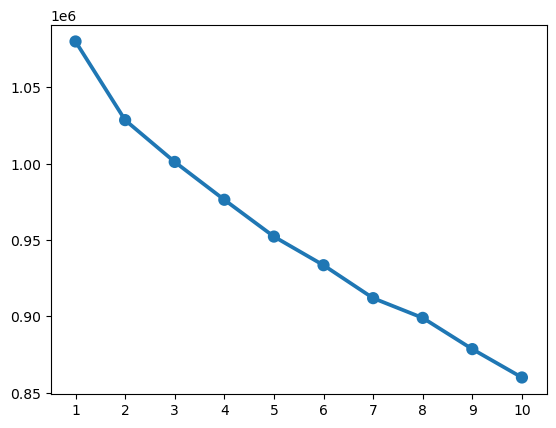

In [81]:
a=[1,2,3,4,5,6,7,8,9,10]
sns.pointplot(a,wss)

In [82]:
from sklearn.metrics import silhouette_samples,silhouette_score

In [87]:
k_means=KMeans(n_clusters=5,random_state=1)
k_means.fit(scaled_data)
labels=k_means.labels_

In [88]:
sil_score=silhouette_score(scaled_data,labels,random_state=1)
sil_score

0.2621445410119563

In [90]:
k_means=KMeans(n_clusters=4,random_state=1)
k_means.fit(scaled_data)
labels=k_means.labels_

In [91]:
sil_score=silhouette_score(scaled_data,labels,random_state=1)
sil_score

0.27563650454445304

In [97]:
data['KMeans_clus_4']=labels

In [98]:
data.head()

,Cust_ID,Orders,Jordan,Gatorade,Samsung,Asus,Udis,Mondelez International,Wrangler,Vans,...,Scabal,Tommy Hilfiger,Hollister,Forever 21,Colavita,Microsoft,Jiffy mix,Kraft,KMeans_clus_6,KMeans_clus_4
0,1,7,0,0,0,0,0,0,0,2,...,0,0,0,0,0,0,0,0,2,2
1,2,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,7,0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,2,2
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,2,2
4,5,10,0,0,0,0,0,0,0,0,...,2,0,0,0,0,0,1,1,3,3


In [99]:
data['KMeans_clus_4'].value_counts().sort_index()

0     5299
1      701
2    22737
3     1263
Name: KMeans_clus_4, dtype: int64

In [102]:
clust_pro=data.iloc[:,1:40].groupby('KMeans_clus_4').mean()
clust_pro['Freq']=data['KMeans_clus_4'].value_counts().sort_index()

In [103]:
clust_pro

,Orders,Jordan,Gatorade,Samsung,Asus,Udis,Mondelez International,Wrangler,Vans,Fila,...,Scabal,Tommy Hilfiger,Hollister,Forever 21,Colavita,Microsoft,Jiffy mix,Kraft,KMeans_clus_6,Freq
KMeans_clus_4,,,,,,,,,,,,,,,,,,,,,
0,4.637667,0.748254,0.665409,0.536705,0.514814,0.473486,0.307605,0.330817,0.275901,0.160785,...,0.946782,0.332327,0.294773,0.215324,0.193999,0.158898,0.078505,0.035667,0.0,5299
1,4.398003,0.174037,0.258203,0.121255,0.111270,0.088445,0.146933,0.047076,0.042796,0.098431,...,0.313837,0.139800,0.012839,0.008559,0.171184,0.121255,0.052782,0.032810,1.0,701
2,4.055636,0.138321,0.137969,0.141268,0.074020,0.064608,0.093108,0.047676,0.063729,0.075824,...,0.225052,0.086467,0.021199,0.014822,0.143027,0.086291,0.056604,0.039099,2.0,22737
3,4.135392,0.626287,0.574822,0.433096,0.277910,0.210610,0.271576,0.267617,0.318290,0.144893,...,0.592241,0.747427,0.219319,0.186857,1.081552,0.476643,0.713381,0.812352,3.0,1263
